In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [5]:
df= sm.datasets.fair.load_pandas().data
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [22]:
df['affair'] = (df.affairs > 0).astype(int)
df['affair']
df.drop(labels='affairs', axis=1, inplace=True)

In [29]:
x = df.drop(labels = 'affair', axis = 1)
x

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0


In [37]:
y = df['affair']
y.unique()

array([1, 0])

In [40]:
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)

(4313, 9)
(2053, 9)


C:\Users\mksmu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


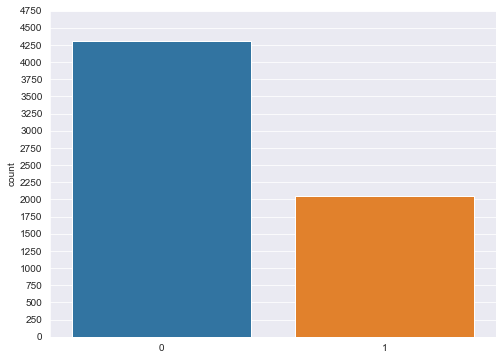

In [42]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5092, 8)
(5092,)
(1274, 8)
(1274,)


In [56]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_train_pred=clf.predict(x_train)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("train set accuracy score: ",accuracy_score(y_train,y_train_pred))
print("test set accuracy score :",  accuracy_score(y_test,y_pred))

train set accuracy score:  0.723095051060487
test set accuracy score : 0.7339089481946625


In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7339089481946625

In [62]:
con_matrics = confusion_matrix(y_test, y_pred)

In [63]:
con_matrics

array([[780,  92],
       [247, 155]], dtype=int64)

In [64]:
true_positive = con_matrics[0][0]
false_positive = con_matrics[0][1]
false_negative = con_matrics[1][0]
true_negative= con_matrics[1][1]


In [65]:
Accuracy = (true_negative + true_positive)/(true_negative+true_positive+false_negative+false_positive)
Accuracy

0.7339089481946625

In [67]:
# precision
precision=true_positive/(false_positive+true_positive)
precision

0.8944954128440367

In [68]:
# recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.759493670886076

In [69]:
# F1 score
F1_score = 2 * (Recall*precision)/(Recall+precision)
F1_score

0.8214849921011058

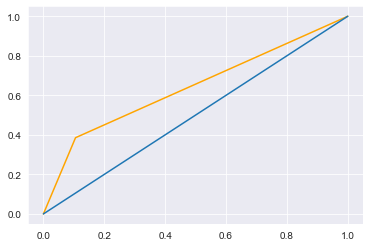

In [70]:
#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1])
plt.show()

In [71]:
print("your prediction is  :",clf.predict(np.array([[3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0]])))

your prediction is  : [0]


In [72]:
import pickle
with open('Logistic.pickle', 'wb') as f:
    pickle.dump(clf, f)